In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Dates
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 1)

In [3]:
# BAC is Bank of America
# C is Citigroup
# GS is Goldman Sachs
# JPM is JPMorgan Chase
# MS is Morgan Stanley
# WFC is Wells Fargo

[*********************100%***********************]  6 of 6 completed


In [3]:
# Fetch stock data from Yahoo
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
df = yf.download(
    tickers, start=start, end=end, group_by='ticker',
    auto_adjust=False
)


[*********************100%***********************]  6 of 6 completed


In [4]:
# Organize into bank_stocks DataFrame
bank_stocks = df.copy()
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [5]:
bank_stocks.head()

Bank Ticker          C                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2010-01-04   33.599998  34.099998  33.400002  34.000000  25.378511  40679350   
2010-01-05   34.200001  35.500000  34.099998  35.299999  26.348871  66861710   
2010-01-06   35.599998  36.799999  35.099998  36.400002  27.169935  67433890   
2010-01-07   36.900002  37.000000  36.099998  36.500000  27.244583  67245190   
2010-01-08   36.500000  36.700001  35.099998  35.900002  26.796722  62409770   

Bank Ticker        WFC                               ...         MS  \
Stock Info        Open   High        Low      Close  ...        Low   
Date                                                 ...              
2010-01-04   27.020000  27.48  26.820000  27.320000  ...  30.629999   
2010-01-05   27.270000  28.24  27.240000  28.070000  ...  30.930000   
2010-01-06   28.030001  28.33  27.790001  28.110001  ...  31.790001   
2010-01-07   28.120001  29.43  27.920000  29.129999  ...  32.270000   
2010-01-08   28.900000  29.35  28.600000  28.860001  ...  31.980000   

Bank Ticker                                          GS              \
Stock Info       Close  Adj Close    Volume        Open        High   
Date                                                                  
2010-01-04   30.910000  21.996056  20371000  170.050003  174.250000   
2010-01-05   32.040001  22.800184  22523400  173.000000  176.259995   
2010-01-06   32.450001  23.091949  17028500  175.380005  175.380005   
2010-01-07   32.919998  23.426409  18693000  174.320007  178.750000   
2010-01-08   32.250000  22.949623  15993400  176.330002  177.429993   

Bank Ticker                                                
Stock Info          Low       Close   Adj Close    Volume  
Date                                                       
2010-01-04   169.509995  173.080002  131.289185   9135000  
2010-01-05   172.570007  176.139999  133.610382  11659400  
2010-01-06   173.759995  174.259995  132.184326   7381100  
2010-01-07   173.949997  177.669998  134.770874   8727400  
2010-01-08   173.949997  174.309998  132.222229   7268100  

[5 rows x 36 columns]

In [6]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
C       80.080002
WFC     65.930000
JPM    139.399994
BAC     35.520000
MS      58.910000
GS     273.380005
dtype: float64

In [7]:
returns = pd.DataFrame()

In [8]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.032505,0.038235,0.017680,0.019370,0.036558,0.027452
2010-01-06,0.011728,0.031162,-0.010673,0.005494,0.012796,0.001425
2010-01-07,0.032947,0.002747,0.019568,0.019809,0.014484,0.036286
2010-01-08,-0.008860,-0.016438,-0.018911,-0.002456,-0.020352,-0.009269


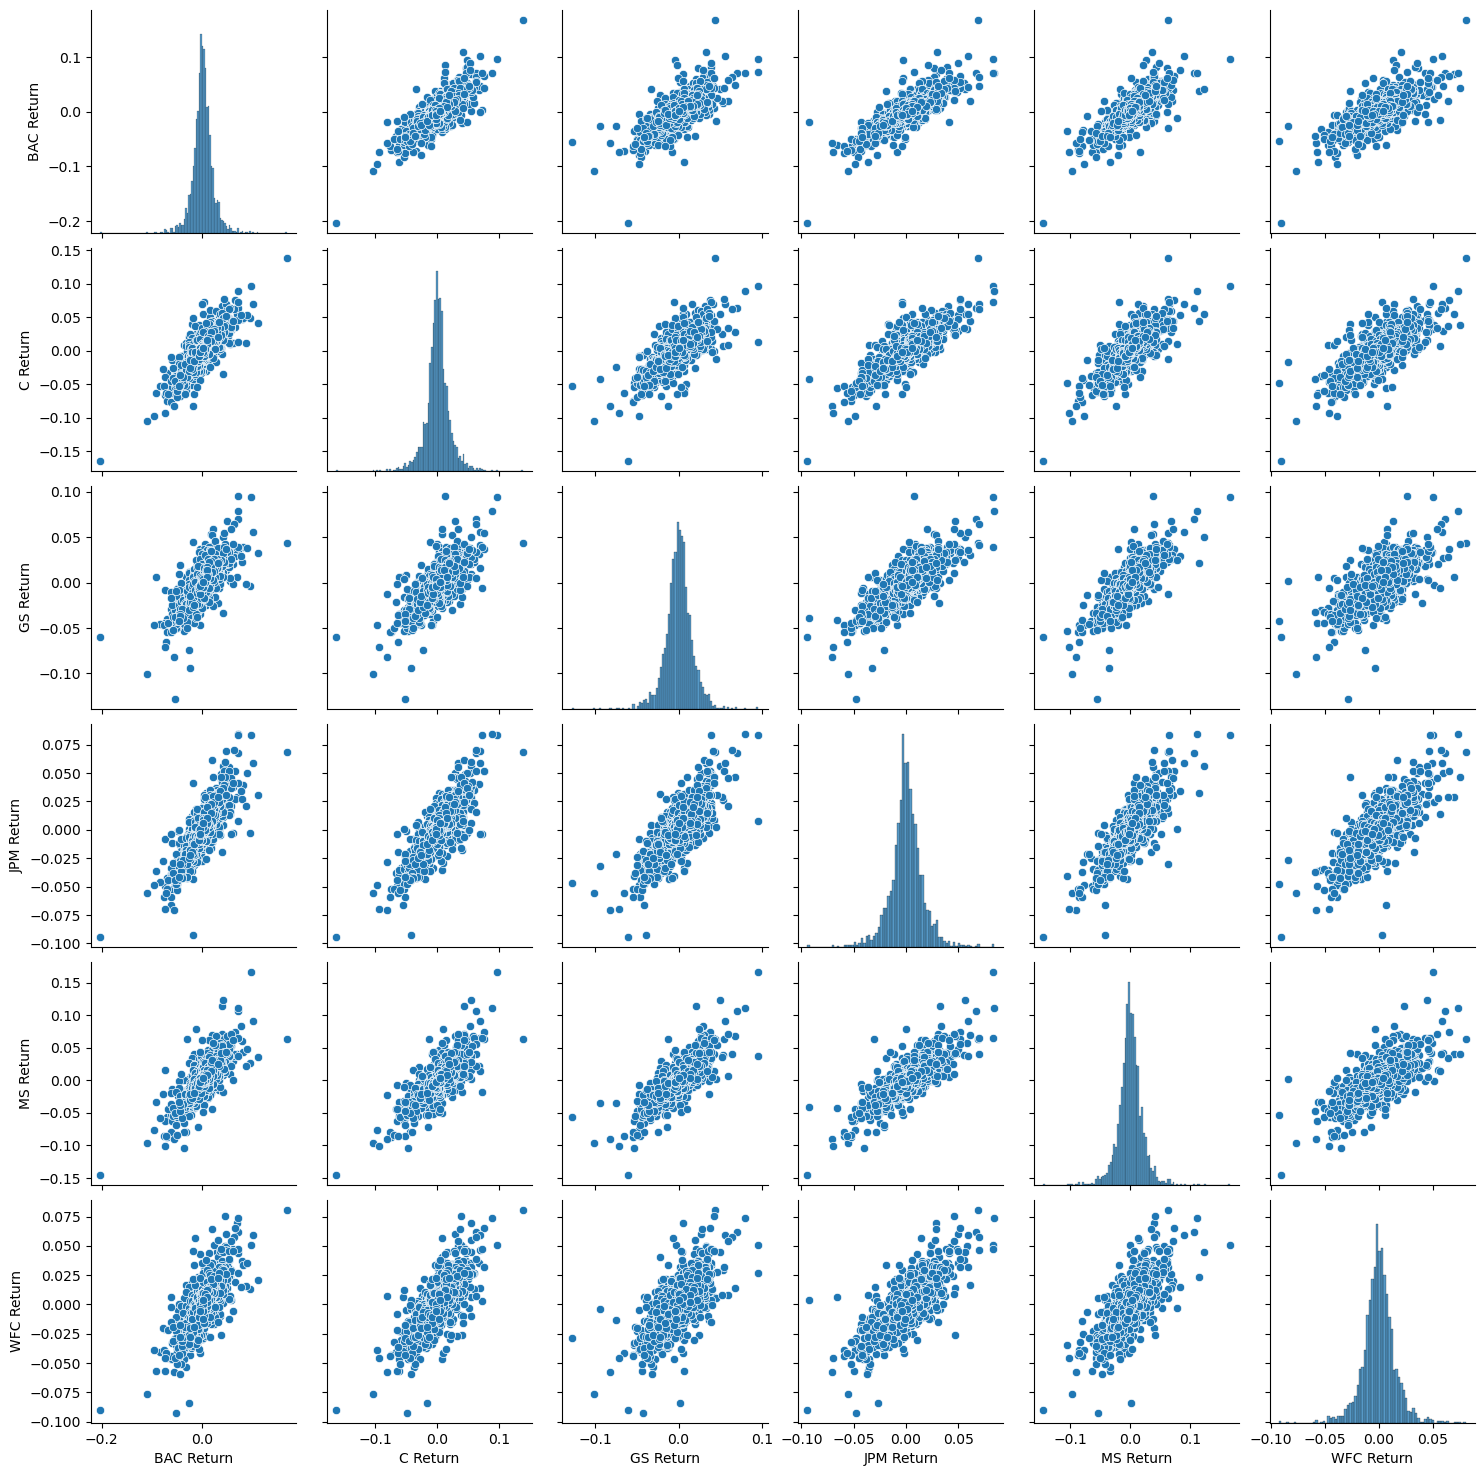

In [9]:
sns.pairplot(returns[1:])
plt.show()

In [10]:
# lowest drop
returns.idxmin()

BAC Return   2011-08-08
C Return     2011-08-08
GS Return    2010-04-16
JPM Return   2011-08-08
MS Return    2011-08-08
WFC Return   2018-02-05
dtype: datetime64[ns]

In [11]:
# Highest in single day
returns.idxmax()

BAC Return   2011-08-09
C Return     2011-08-09
GS Return    2019-01-16
JPM Return   2011-11-30
MS Return    2011-10-27
WFC Return   2011-08-09
dtype: datetime64[ns]

In [12]:
returns.std() # Morgan Stanley is the Riskiest

BAC Return    0.020466
C Return      0.019520
GS Return     0.016418
JPM Return    0.015781
MS Return     0.020769
WFC Return    0.015169
dtype: float64

In [15]:
returns.loc['2015-01-01':'2015-12-31']

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2015-01-02,0.000559,0.002772,0.002992,-0.001438,-0.002320,-0.002189
2015-01-05,-0.029050,-0.031515,-0.031223,-0.031045,-0.031258,-0.027422
2015-01-06,-0.029919,-0.035205,-0.020229,-0.025929,-0.028800,-0.020865
2015-01-07,0.004745,0.009270,0.014903,0.001526,0.014278,0.005951
2015-01-08,0.020661,0.015048,0.015965,0.022346,0.014889,0.022137
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


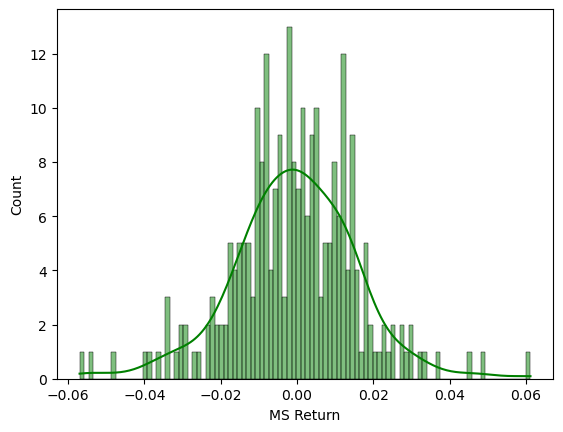

In [19]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31', 'MS Return'] , color='green', bins=100 , kde=True)
plt.show()

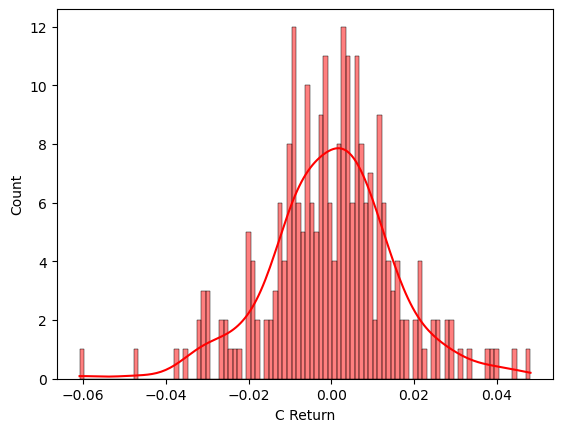

In [23]:
sns.histplot( returns.loc['2015-01-01':'2015-12-31', 'C Return'] , color='red', bins=100 , kde=True )
plt.show()